## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Identify if it is necessary to perform log transformations on a set of features
* Perform log transformations on different features of a dataset
* Determine if it is necessary to perform normalization/standardization for a specific model or set of data
* Compare the different standardization and normalization techniques
* Use standardization/normalization on features of a dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables (`'RAD'` and `'TAX'`) and deleted the `'NOX'` (nitride oxide concentration) variable because it was highly correlated with two other features.

In [1]:
import pandas as pd
%matplotlib inline
from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD', 'TAX'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop('NOX', axis=1)

## Look at the histograms for the continuous variables

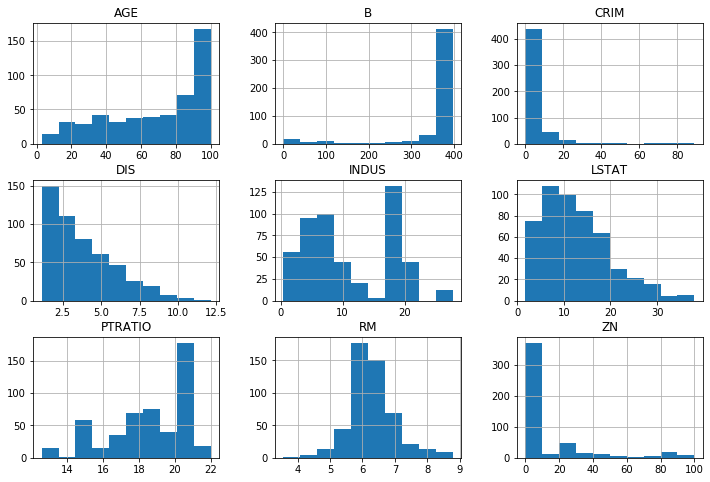

In [13]:
df=boston_features[['CRIM','ZN','INDUS', 'RM', 'AGE', 'DIS', 'B', 'PTRATIO', 'LSTAT']]
df.hist(figsize=[12,8]);

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the `'ZN'` feature?  

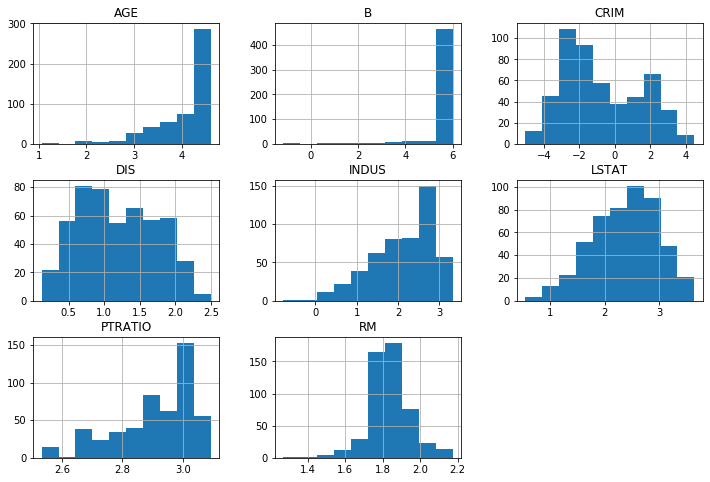

In [17]:
import numpy as np
df_log = pd.DataFrame([])
df_log['CRIM'] = np.log(df['CRIM'])
df_log['INDUS'] = np.log(df['INDUS'])
df_log['RM'] = np.log(df['RM'])
df_log['AGE'] = np.log(df['AGE'])
df_log['DIS'] = np.log(df['DIS'])
df_log['B'] = np.log(df['B'])
df_log['LSTAT'] = np.log(df['LSTAT'])
df_log['PTRATIO'] = np.log(df['PTRATIO'])
df_log.hist(figsize  = [12, 8]);

`'ZN'` has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [24]:
df_log['ZN'] = np.log(df['ZN'])
df['ZN'].describe()



count    506.000000
mean       2.974308
std        6.156807
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       25.000000
Name: ZN, dtype: float64

## Try different types of transformations on the continuous variables

Store your final features in a DataFrame `features_final`: 

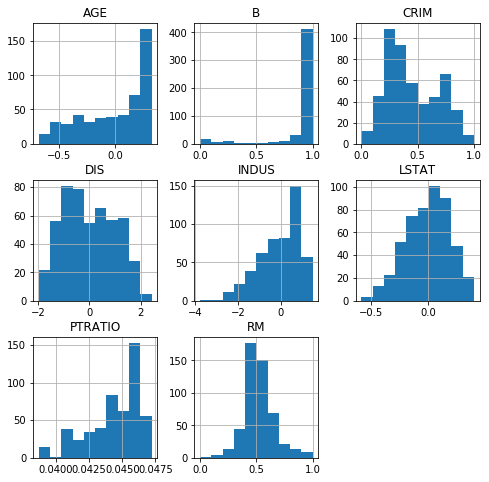

In [25]:
age = df['AGE']
b = df['B']
rm = df['RM']
logcrim = df_log['CRIM'] 
logdis = df_log['DIS']  
logindus = df_log['INDUS'] 
loglstat = df_log['LSTAT']
logptratio = df_log['PTRATIO']

features_final= pd.DataFrame([])

features_final['CRIM'] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
features_final['B'] = (b-min(b))/(max(b)-min(b))
features_final['RM'] = (rm-min(rm))/(max(rm)-min(rm))
features_final['DIS']   = (logdis-np.mean(logdis))/np.sqrt(np.var(logdis))
features_final['INDUS'] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
features_final['LSTAT'] = (loglstat-np.mean(loglstat))/(max(loglstat)-min(loglstat))
features_final['AGE'] = (age-np.mean(age))/(max(age)-min(age))
features_final['PTRATIO'] = (logptratio)/(np.linalg.norm(logptratio))

features_final.hist(figsize  = [8, 8]);

## Summary
Great! You've now got some hands-on practice transforming data using log transforms, feature scaling, and normalization!